In [2]:
import nltk
from collections import Counter
import glob
import os
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Paths for all the different corpora
folderpaths = ['../AnxietyMeditations/', '../SleepMeditations/', '../LearningAndGrowthMeditations/', '../MorningMeditations/']

# Strings to store text for each corpora and all corpora
all_text = ""
anxiety_text = ""
sleep_text = ""
learningNgrowth_text = ""
morning_text = ""

for folder in folderpaths:
    if folder == '../AnxietyMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                anxiety_text += text
                all_text += text
    elif folder == '../SleepMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                sleep_text += text
                all_text += text
    elif folder == '../LearningAndGrowthMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                learningNgrowth_text += text
                all_text += text
    elif folder == '../MorningMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                morning_text += text
                all_text += text
    
newStopWords = ['[', ']', '`', '#', '$', '(', ')', "Music", ':', "....", "--", ",", "''", '`', '"']
stopwords = set(stopwords.words('english') + newStopWords + list(string.punctuation))

# Tokenizing by word and filtering stopwords
all_tokens = [w for w in word_tokenize(all_text) if not w in stopwords]
anxiety_tokens = [w for w in word_tokenize(anxiety_text) if not w in stopwords]
sleep_tokens = [w for w in word_tokenize(sleep_text) if not w in stopwords]
learningNgrowth_tokens = [w for w in word_tokenize(learningNgrowth_text) if not w in stopwords]
morning_tokens = [w for w in word_tokenize(morning_text) if not w in stopwords]

print(len(all_tokens))
print(len(anxiety_tokens))
print(len(sleep_tokens))
print(len(learningNgrowth_tokens))
print(len(morning_tokens))

324099
53663
145068
75501
49867


Tokenized  by word all the corpora individually and combined. Sleep meditations have the most tokens individually which is expected becuase sleep has the largest dataset. Similarly, Morning meditations have shorter transcripts, so it has the least tokens individually.

In [3]:
# Part of Speech tagging for each and combined corpora
all_pos_tags = nltk.pos_tag(all_tokens)
anxiety_pos_tags = nltk.pos_tag(anxiety_tokens)
sleep_pos_tags = nltk.pos_tag(sleep_tokens)
learningNgrowth_pos_tags = nltk.pos_tag(learningNgrowth_tokens)
morning_pos_tags = nltk.pos_tag(morning_tokens)

# Counting the numbers of each type of part of speech
all_counts = Counter(tag for word, tag in all_pos_tags)

anxiety_counts = Counter(tag for word, tag in anxiety_pos_tags)

sleep_counts = Counter(tag for word, tag in sleep_pos_tags)

learningNgrowth_counts = Counter(tag for word, tag in learningNgrowth_pos_tags)

morning_counts = Counter(tag for word, tag in morning_pos_tags)

A dictionary for the top 10 part of speech words for all corpora.

In [5]:
# Creating a dictionary for all part of speech words for all corpora
all_pos_dict = dict()

for tuple in all_pos_tags:
    if tuple[1] in all_pos_dict:
        specific_pos = all_pos_dict.get(tuple[1])
        specific_pos.append(tuple[0])
        all_pos_dict[tuple[1]] = specific_pos
    else:
        specific_pos = list()
        specific_pos.append(tuple[0])
        all_pos_dict[tuple[1]] = specific_pos

# Creating a dictionary for the top 10 part of speech words for all corpora
all_top_pos_words = dict()

for key, value in all_pos_dict.items():
    item_list = list()
    all_top_pos_words[key] = Counter(value).most_common(10)

all_sorted_top_pos_words = sorted(all_top_pos_words.items(), key=lambda x:x[1])
print(all_sorted_top_pos_words)

[('POS', [("'s", 1707), ("'d", 1), ('kindness', 1), ("'cause", 1), ('youwelcome', 1), ('neck', 1), ('youThis', 1)]), (':', [('...', 423)]), ('CC', [('And', 445), ('either', 79), ('But', 27), ('smooth', 10), ('Or', 7), ('neither', 6), ('youhello', 3), ('less', 2), ('leather', 2), ('neck', 2)]), ('PRP', [('I', 14965), ('us', 488), ('You', 212), ('It', 107), ('We', 73), ('self', 44), ('They', 8), ("'s", 7), ('ourself', 4), ('okay', 4)]), ('NNPS', [('Mayans', 6), ('States', 3), ('Sensations', 2), ('Centers', 1), ('Feelings', 1)]), ('NNP', [('Sun', 229), ('’', 142), ('Laughter', 93), ('Just', 91), ('Earth', 82), ('Springs', 81), ('Feel', 79), ('So', 77), ('Visions', 73), ('Let', 71)]), ('EX', [('There', 23)]), ('WP', [('What', 58), ('Who', 19), ('whoever', 2), ('whichever', 2), ('watcher', 2), ('chat', 1), ('warmth', 1), ('somewhat', 1), ('wherever', 1)]), ('PRP$', [('Your', 37), ('Our', 9), ('My', 4), ('harbour', 2), ('Her', 1), ('“', 1), ('watcher', 1), ('mother', 1)]), ('``', [('``', 75)

Dictionaries for the top 10 part of speech words for each corpora.

In [6]:
# Creating a dictionary for all part of speech words for the anxiety meditations corpora
anxiety_pos_dict = dict()

for tuple in anxiety_pos_tags:
    if tuple[1] in anxiety_pos_dict:
        specific_pos = anxiety_pos_dict.get(tuple[1])
        specific_pos.append(tuple[0])
        anxiety_pos_dict[tuple[1]] = specific_pos
    else:
        specific_pos = list()
        specific_pos.append(tuple[0])
        anxiety_pos_dict[tuple[1]] = specific_pos

# Creating a dictionary for the top 10 part of speech words for the anxiety meditations corpora
anxiety_top_pos_words = dict()

for key, value in anxiety_pos_dict.items():
    item_list = list()
    anxiety_top_pos_words[key] = Counter(value).most_common(10)

anxiety_sorted_top_pos_words = sorted(anxiety_top_pos_words.items(), key=lambda x:x[1])
print(anxiety_sorted_top_pos_words)

[('VBP', [("'re", 211), ('know', 128), ('continue', 122), ('take', 119), ('see', 119), ('feel', 106), ('make', 93), ('need', 80), ('begin', 80), ('go', 78)]), ('POS', [("'s", 308), ("'d", 1), ('kindness', 1), ("'cause", 1), ('youwelcome', 1)]), (':', [('...', 288)]), ('CC', [('And', 95), ('either', 15), ('smooth', 3), ('But', 2), ('Or', 2), ('neither', 1), ('legs', 1)]), ('NNP', [('Feel', 38), ('Imagine', 31), ('Relax', 29), ('Allow', 28), ('So', 26), ('Take', 24), ('Notice', 23), ('Just', 22), ('Let', 21), ('Pause', 19)]), ('PRP', [('I', 774), ('You', 71), ('us', 47), ('It', 27), ('We', 15), ('self', 11), ("'s", 3), ('They', 3), ('ourself', 2), ('observe', 1)]), ('EX', [('There', 12)]), ('WP', [('What', 35), ('Who', 3), ('chat', 1)]), ('PRP$', [('Your', 17), ('My', 2), ('harbour', 1), ('Our', 1)]), ('``', [('``', 23)]), ('RP', [('back', 48), ('away', 23), ('okay', 8), ('awareness', 8), ('around', 4), ('background', 1), ('crown', 1), ('observe', 1), ('orange', 1), ('discover', 1)]), ('

In [7]:
# Creating a dictionary for all part of speech words for the sleep meditations corpora
sleep_pos_dict = dict()

for tuple in sleep_pos_tags:
    if tuple[1] in sleep_pos_dict:
        specific_pos = sleep_pos_dict.get(tuple[1])
        specific_pos.append(tuple[0])
        sleep_pos_dict[tuple[1]] = specific_pos
    else:
        specific_pos = list()
        specific_pos.append(tuple[0])
        sleep_pos_dict[tuple[1]] = specific_pos

# Creating a dictionary for the top 10 part of speech words for the sleep meditations corpora
sleep_top_pos_words = dict()

for key, value in sleep_pos_dict.items():
    item_list = list()
    sleep_top_pos_words[key] = Counter(value).most_common(10)

sleep_sorted_top_pos_words = sorted(sleep_top_pos_words.items(), key=lambda x:x[1])
print(sleep_sorted_top_pos_words)

[('POS', [("'s", 683), ('neck', 1)]), (':', [('...', 22)]), ('PRP', [('I', 6366), ('us', 137), ('self', 18), ('You', 16), ('We', 4), ('It', 3), ("'s", 1), ('melt', 1), ('observe', 1), ('yes', 1)]), ('NNPS', [('Mayans', 5), ('Centers', 1)]), ('NNP', [('Sun', 184), ('Springs', 81), ('Laughter', 54), ('Jason', 53), ('Hope', 49), ('Earth', 35), ('Stevenson', 33), ('Jackson', 23), ('United', 20), ('Raymond', 19)]), ('WP', [('Who', 15), ('warmth', 1), ('whoever', 1), ('somewhat', 1), ('wherever', 1)]), ('RP', [('back', 74), ('away', 65), ('around', 16), ('behind', 4), ('drift', 4), ('aside', 3), ('take', 2), ('breathe', 2), ('observe', 2), ('okay', 2)]), ('RB', [('back', 642), ('simply', 448), ('away', 382), ('slowly', 314), ('gently', 303), ('completely', 296), ('even', 251), ('deeply', 249), ('right', 207), ('well', 205)]), ('RBS', [('best', 18), ('melt', 1)]), ('NN', [('body', 2455), ('breath', 1155), ('mind', 1123), ('moment', 977), ('life', 882), ('way', 738), ('energy', 738), ('time', 

In [8]:
# Creating a dictionary for all part of speech words for the learning and growth meditations corpora
learningNgrowth_pos_dict = dict()

for tuple in learningNgrowth_pos_tags:
    if tuple[1] in learningNgrowth_pos_dict:
        specific_pos = learningNgrowth_pos_dict.get(tuple[1])
        specific_pos.append(tuple[0])
        learningNgrowth_pos_dict[tuple[1]] = specific_pos
    else:
        specific_pos = list()
        specific_pos.append(tuple[0])
        learningNgrowth_pos_dict[tuple[1]] = specific_pos

# Creating a dictionary for the top 10 part of speech words for the learning and growth meditations corpora
learningNgrowth_top_pos_words = dict()

for key, value in learningNgrowth_pos_dict.items():
    item_list = list()
    learningNgrowth_top_pos_words[key] = Counter(value).most_common(10)

learningNgrowth_sorted_top_pos_words = sorted(learningNgrowth_top_pos_words.items(), key=lambda x:x[1])
print(learningNgrowth_sorted_top_pos_words)

[('POS', [("'s", 419)]), (':', [('...', 27)]), ('CC', [('And', 49), ('either', 13), ('But', 4), ('smooth', 3), ('neck', 2), ('learn', 1), ('neither', 1), ('note', 1), ('knife', 1), ('pitcher', 1)]), ('PRP', [('I', 7306), ('us', 88), ('It', 19), ('You', 14), ('self', 9), ('We', 6), ('okay', 2), ('oneself', 2), ('They', 2), ('mother', 2)]), ('NNPS', [('States', 3), ('Mayans', 1)]), ('EX', [('There', 1)]), ('TO', [('To', 12), ('na', 11)]), ('NNP', [('Visions', 73), ('’', 38), ('God', 28), ('English', 19), ('Just', 19), ("I'm", 19), ('Sun', 18), ('Laughter', 18), ('So', 15), ('Take', 13)]), ('WP', [('What', 7), ('Who', 1)]), ('PRP$', [('Your', 7), ('Our', 1), ('My', 1), ('Her', 1)]), ('RP', [('back', 37), ('away', 17), ('observer', 9), ('around', 5), ('awareness', 4), ('along', 2), ("a's", 1), ('orbs', 1), ('achieve', 1), ('become', 1)]), ('RB', [('back', 234), ('always', 219), ('already', 203), ('exactly', 190), ('away', 175), ('well', 126), ('really', 124), ('ever', 120), ('right', 117),

In [9]:
# Creating a dictionary for all part of speech words for the morning meditations corpora
morning_pos_dict = dict()

for tuple in morning_pos_tags:
    if tuple[1] in morning_pos_dict:
        specific_pos = morning_pos_dict.get(tuple[1])
        specific_pos.append(tuple[0])
        morning_pos_dict[tuple[1]] = specific_pos
    else:
        specific_pos = list()
        specific_pos.append(tuple[0])
        morning_pos_dict[tuple[1]] = specific_pos

# Creating a dictionary for the top 10 part of speech words for the morning meditations corpora
morning_top_pos_words = dict()

for key, value in morning_pos_dict.items():
    item_list = list()
    morning_top_pos_words[key] = Counter(value).most_common(10)

morning_sorted_top_pos_words = sorted(morning_top_pos_words.items(), key=lambda x:x[1])
print(morning_sorted_top_pos_words)

[('VBP', [("'re", 204), ("'m", 109), ('continue', 92), ('go', 90), ('feel', 85), ('take', 82), ('find', 79), ('begin', 77), ('see', 68), ('know', 67)]), ('POS', [("'s", 297), ('youThis', 1)]), (':', [('...', 86)]), ('CC', [('And', 296), ('either', 30), ('But', 21), ('Or', 5), ('endless', 1), ('orb', 1), ('yet', 1), ('less', 1), ('enjoy', 1), ('love', 1)]), ('PRP', [('I', 519), ('us', 216), ('You', 111), ('It', 58), ('We', 48), ('self', 6), ('She', 4), ('He', 3), ('They', 3), ("'s", 2)]), ('NNPS', [('Sensations', 2), ('Feelings', 1)]), ('EX', [('There', 10)]), ('TO', [('To', 19), ('na', 11)]), ('WP', [('What', 16), ('whichever', 2), ('watcher', 2), ('whoever', 1)]), ('PRP$', [('Your', 13), ('Our', 7), ('“', 1), ('watcher', 1), ('mother', 1), ('My', 1)]), ('``', [('``', 52)]), ('RP', [('back', 42), ('away', 21), ('awareness', 10), ('behind', 2), ('’', 2), ('breath', 1), ('toe', 1), ('mind', 1), ('countdown', 1), ('arm', 1)]), ('RB', [('back', 261), ('slowly', 218), ('gently', 144), ('eve

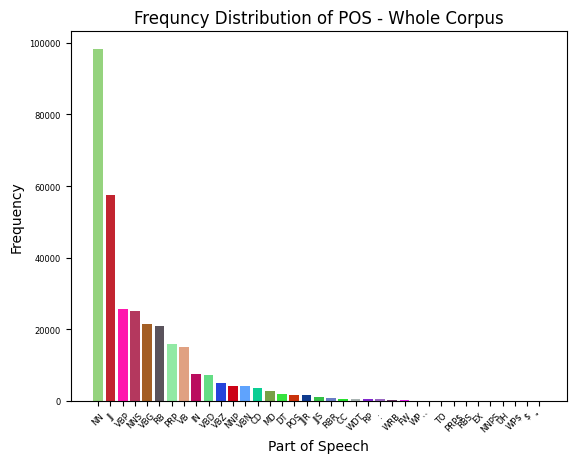

In [10]:
import numpy as np
import matplotlib.pyplot as plt

count = sorted(all_counts.items(), key=lambda x:x[1], reverse=True)
counts = dict(count)
fig = plt.figure()
col = (np.random.random(), np.random.random(), np.random.random())
plt.bar(counts.keys(), height= counts.values(), color=np.random.rand(len(counts),3))
plt.xticks(rotation=45)
plt.tick_params(labelsize=6)
plt.xlabel("Part of Speech")
plt.ylabel("Frequency")
plt.title("Frequncy Distribution of POS - Whole Corpus")
plt.show()

Graph represents the frequency distribution of all POS tags from all corpora.

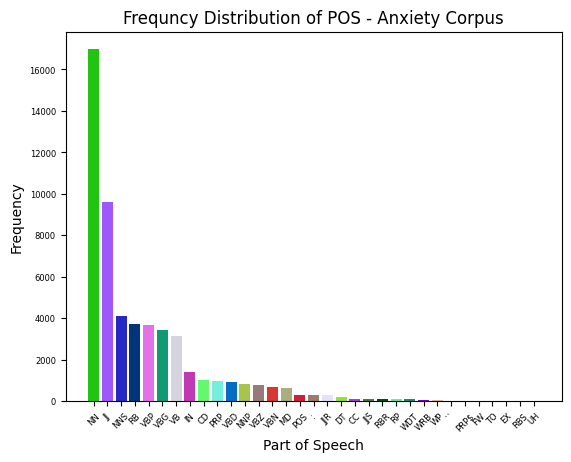

In [11]:
count = sorted(anxiety_counts.items(), key=lambda x:x[1], reverse=True)
counts = dict(count)
fig = plt.figure()
col = (np.random.random(), np.random.random(), np.random.random())
plt.bar(counts.keys(), height= counts.values(), color=np.random.rand(len(counts),3))
plt.xticks(rotation=45)
plt.tick_params(labelsize=6)
plt.xlabel("Part of Speech")
plt.ylabel("Frequency")
plt.title("Frequncy Distribution of POS - Anxiety Corpus")
plt.show()

Graph represents the frequency distribution of all POS tags from the anxiety meditations corpora.

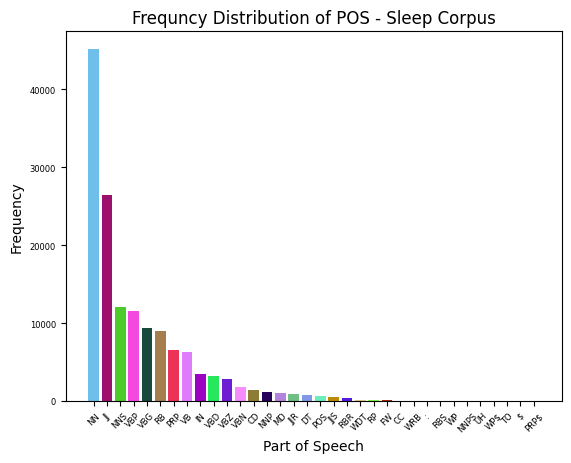

In [12]:
count = sorted(sleep_counts.items(), key=lambda x:x[1], reverse=True)
counts = dict(count)
fig = plt.figure()
col = (np.random.random(), np.random.random(), np.random.random())
plt.bar(counts.keys(), height= counts.values(), color=np.random.rand(len(counts),3))
plt.xticks(rotation=45)
plt.tick_params(labelsize=6)
plt.xlabel("Part of Speech")
plt.ylabel("Frequency")
plt.title("Frequncy Distribution of POS - Sleep Corpus")
plt.show()

Graph represents the frequency distribution of all POS tags from the sleep meditations corpora.

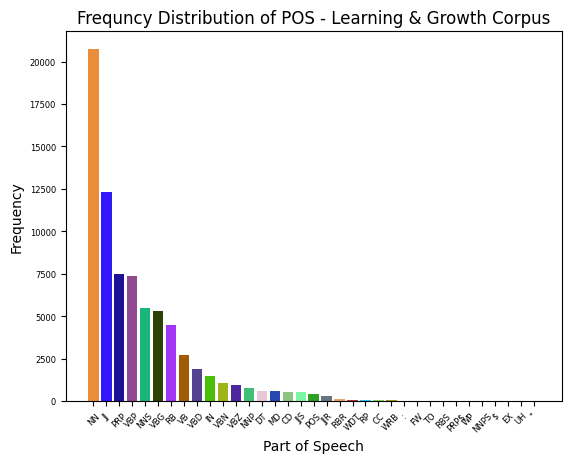

In [13]:
count = sorted(learningNgrowth_counts.items(), key=lambda x:x[1], reverse=True)
counts = dict(count)
fig = plt.figure()
col = (np.random.random(), np.random.random(), np.random.random())
plt.bar(counts.keys(), height= counts.values(), color=np.random.rand(len(counts),3))
plt.xticks(rotation=45)
plt.tick_params(labelsize=6)
plt.xlabel("Part of Speech")
plt.ylabel("Frequency")
plt.title("Frequncy Distribution of POS - Learning & Growth Corpus")
plt.show()

Graph represents the frequency distribution of all POS tags from the learning and growth meditations corpora.

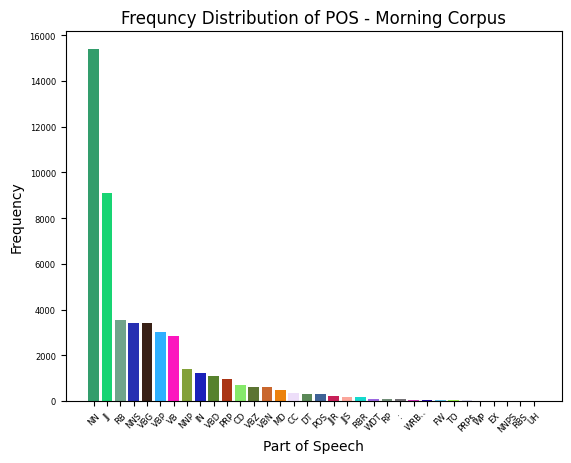

In [14]:
count = sorted(morning_counts.items(), key=lambda x:x[1], reverse=True)
counts = dict(count)
fig = plt.figure()
col = (np.random.random(), np.random.random(), np.random.random())
plt.bar(counts.keys(), height= counts.values(), color=np.random.rand(len(counts),3))
plt.xticks(rotation=45)
plt.tick_params(labelsize=6)
plt.xlabel("Part of Speech")
plt.ylabel("Frequency")
plt.title("Frequncy Distribution of POS - Morning Corpus")
plt.show()

Graph represents the frequency distribution of all POS tags from the morning meditations corpora.

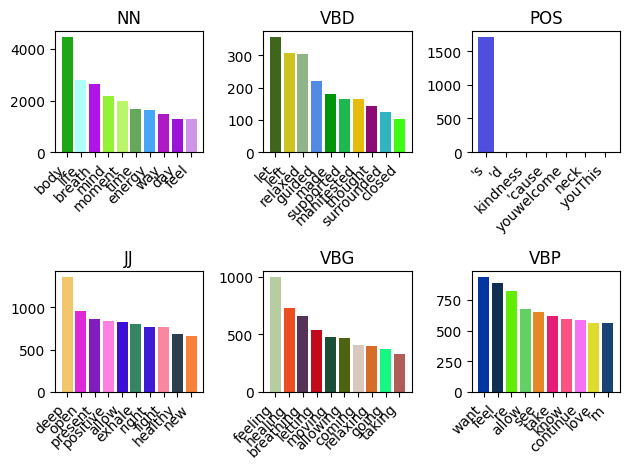

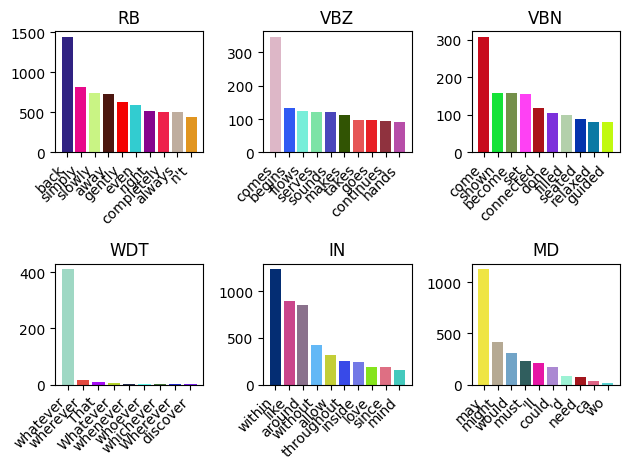

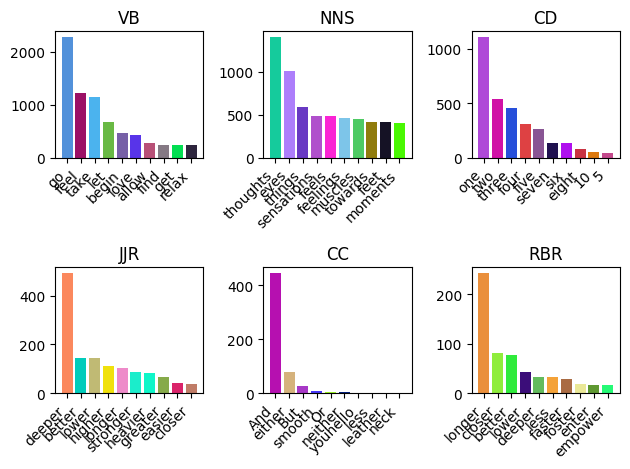

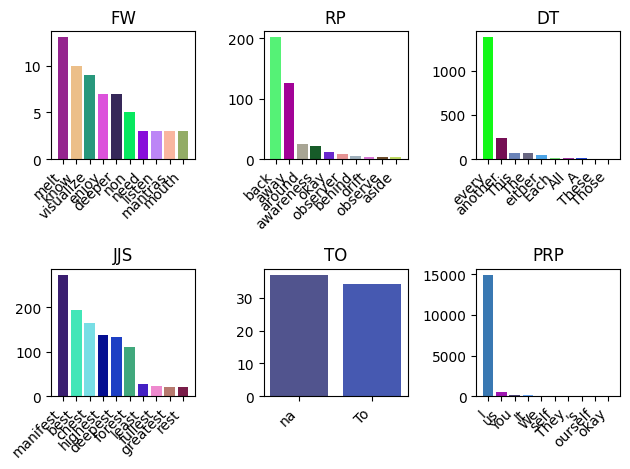

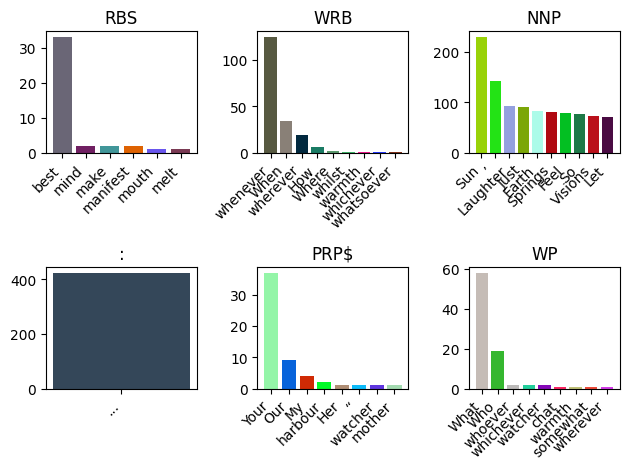

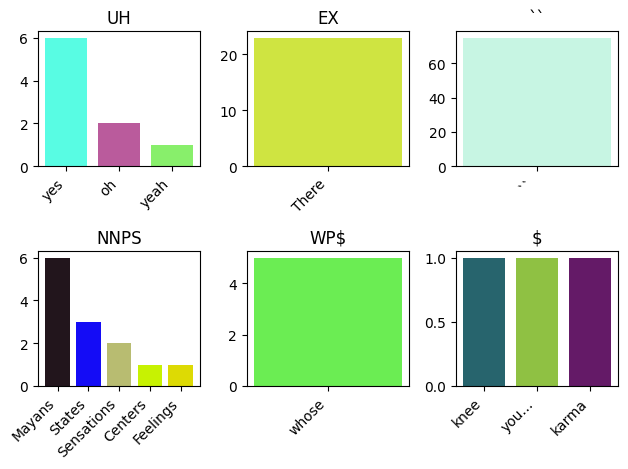

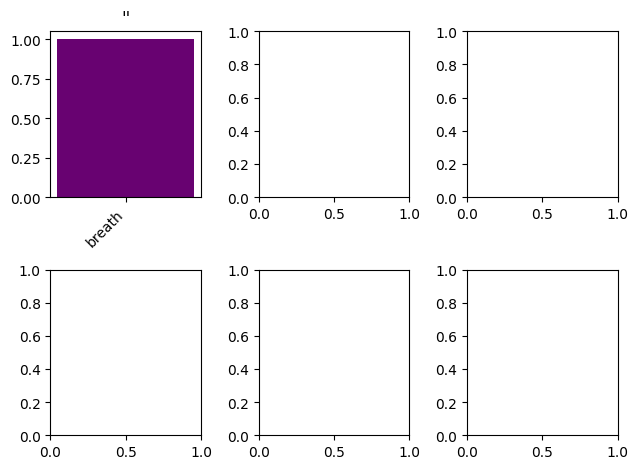

In [17]:
key = list(all_top_pos_words.keys())
val = list(all_top_pos_words.values())

for i in range (0, len(key), 6):
    fig, axs = plt.subplots(2, 3)
    
    if (i < len(key)): 
        k1 = key[i]
        v1 = val[i]
       
        v1_name = list()
        v1_freq = list()
        
        for j in v1:
            v1_name.append(j[0])
            v1_freq.append(j[1])
            
        axs[0, 0].bar(v1_name, v1_freq, color=np.random.rand(len(counts), 3))
        for label in axs[0, 0].get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')
        axs[0, 0].set_title(k1)
    
        if (i + 1 < len(key)):
            k2 = key[i+1]
            v2 = val[i+1]

            v2_name = list()
            v2_freq = list()
            
            for j in v2:
                v2_name.append(j[0])
                v2_freq.append(j[1])
                
            axs[0, 1].bar(v2_name, v2_freq, color=np.random.rand(len(counts), 3))
            for label in axs[0, 1].get_xticklabels():
                label.set_rotation(45)
                label.set_horizontalalignment('right')
            axs[0, 1].set_title(k2)

            if (i+2 < len(key)):
                k3 = key[i+2]
                v3 = val[i+2]

                v3_name = list()
                v3_freq = list()
                
                for j in v3:
                    v3_name.append(j[0])
                    v3_freq.append(j[1])
                    
                axs[0, 2].bar(v3_name, v3_freq, color=np.random.rand(len(counts), 3))
                for label in axs[0, 2].get_xticklabels():
                    label.set_rotation(45)
                    label.set_horizontalalignment('right')
                axs[0, 2].set_title(k3)
                    
                if (i+3 < len(key)):
                    k4 = key[i+3]
                    v4 = val[i+3]    

                    v4_name = list()
                    v4_freq = list()
                    
                    for j in v4:
                        v4_name.append(j[0])
                        v4_freq.append(j[1])
                        
                    axs[1, 0].bar(v4_name, v4_freq, color=np.random.rand(len(counts), 3))
                    for label in axs[1, 0].get_xticklabels():
                        label.set_rotation(45)
                        label.set_horizontalalignment('right')
                    axs[1, 0].set_title(k4)
                        
                    if (i+4 < len(key)):
                        k5 = key[i+4]
                        v5 = val[i+4]
    
                        v5_name = list()
                        v5_freq = list()
                        
                        for j in v5:
                            v5_name.append(j[0])
                            v5_freq.append(j[1])
                            
                        axs[1, 1].bar(v5_name, v5_freq, color=np.random.rand(len(counts), 3))
                        for label in axs[1, 1].get_xticklabels():
                            label.set_rotation(45)
                            label.set_horizontalalignment('right')
                        axs[1, 1].set_title(k5)
                        
                        if (i+5 < len(key)):
                            k6 = key[i+5]
                            v6 = val[i+5]
        
                            v6_name = list()
                            v6_freq = list()
                            
                            for j in v6:
                                v6_name.append(j[0])
                                v6_freq.append(j[1])
                                
                            axs[1, 2].bar(v6_name, v6_freq, color=np.random.rand(len(counts), 3))
                            for label in axs[1, 2].get_xticklabels():
                                label.set_rotation(45)
                                label.set_horizontalalignment('right')
                            axs[1, 2].set_title(k6)
    
    fig.tight_layout()
    plt.show()


Top 10 words in each POS for all corpora combined.

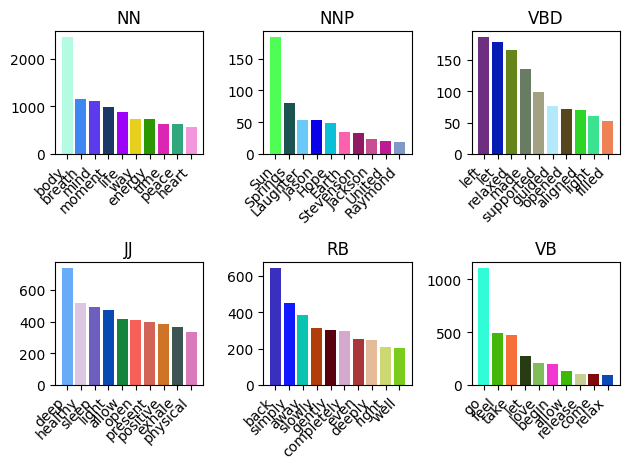

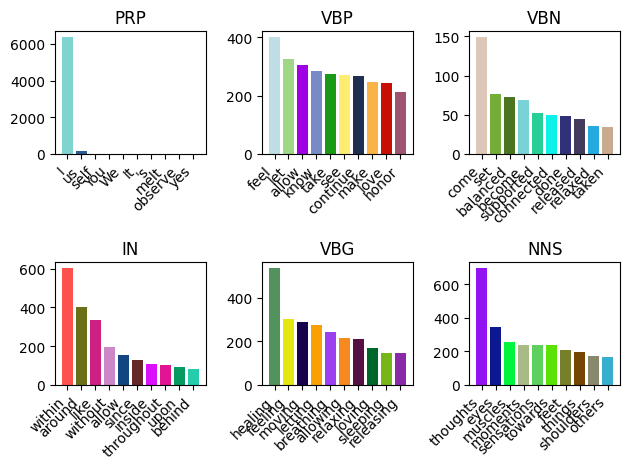

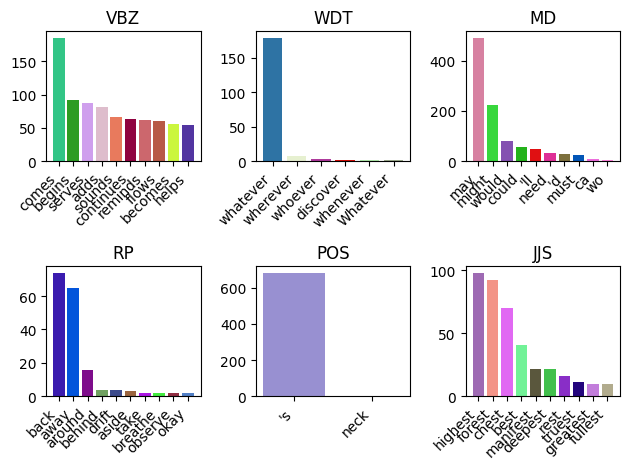

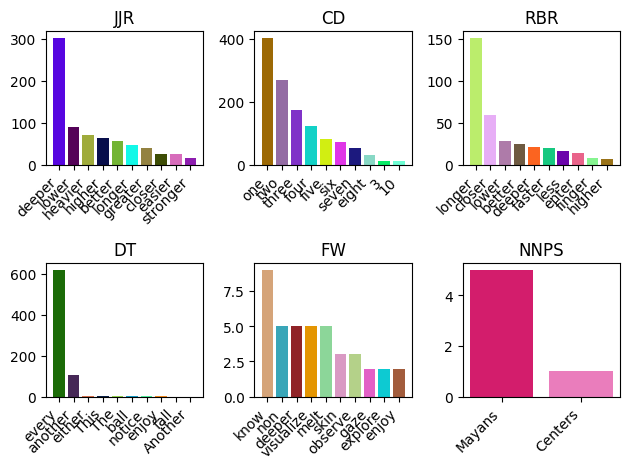

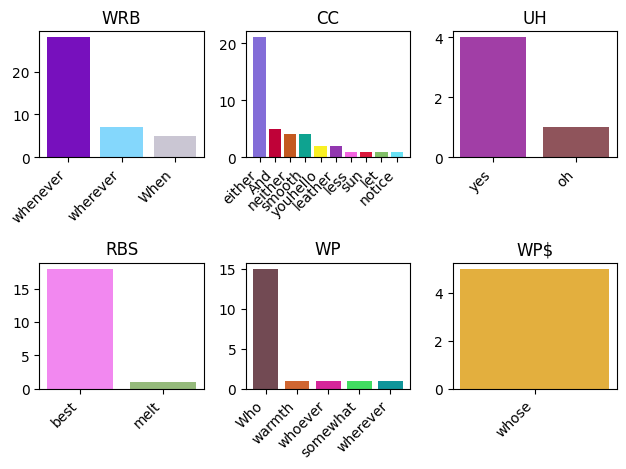

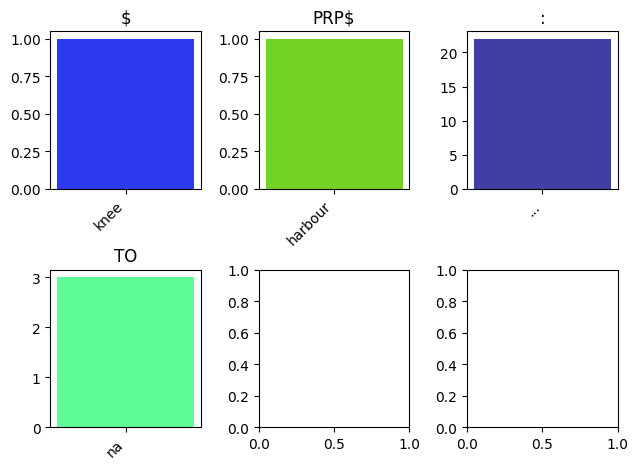

In [18]:
key = list(sleep_top_pos_words.keys())
val = list(sleep_top_pos_words.values())

for i in range (0, len(key), 6):
    fig, axs = plt.subplots(2, 3)
    
    if (i < len(key)): 
        k1 = key[i]
        v1 = val[i]
       
        v1_name = list()
        v1_freq = list()
        
        for j in v1:
            v1_name.append(j[0])
            v1_freq.append(j[1])
            
        axs[0, 0].bar(v1_name, v1_freq, color=np.random.rand(len(counts), 3))
        for label in axs[0, 0].get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')
        axs[0, 0].set_title(k1)
    
        if (i + 1 < len(key)):
            k2 = key[i+1]
            v2 = val[i+1]

            v2_name = list()
            v2_freq = list()
            
            for j in v2:
                v2_name.append(j[0])
                v2_freq.append(j[1])
                
            axs[0, 1].bar(v2_name, v2_freq, color=np.random.rand(len(counts), 3))
            for label in axs[0, 1].get_xticklabels():
                label.set_rotation(45)
                label.set_horizontalalignment('right')
            axs[0, 1].set_title(k2)

            if (i+2 < len(key)):
                k3 = key[i+2]
                v3 = val[i+2]

                v3_name = list()
                v3_freq = list()
                
                for j in v3:
                    v3_name.append(j[0])
                    v3_freq.append(j[1])
                    
                axs[0, 2].bar(v3_name, v3_freq, color=np.random.rand(len(counts), 3))
                for label in axs[0, 2].get_xticklabels():
                    label.set_rotation(45)
                    label.set_horizontalalignment('right')
                axs[0, 2].set_title(k3)
                    
                if (i+3 < len(key)):
                    k4 = key[i+3]
                    v4 = val[i+3]    

                    v4_name = list()
                    v4_freq = list()
                    
                    for j in v4:
                        v4_name.append(j[0])
                        v4_freq.append(j[1])
                        
                    axs[1, 0].bar(v4_name, v4_freq, color=np.random.rand(len(counts), 3))
                    for label in axs[1, 0].get_xticklabels():
                        label.set_rotation(45)
                        label.set_horizontalalignment('right')
                    axs[1, 0].set_title(k4)
                        
                    if (i+4 < len(key)):
                        k5 = key[i+4]
                        v5 = val[i+4]
    
                        v5_name = list()
                        v5_freq = list()
                        
                        for j in v5:
                            v5_name.append(j[0])
                            v5_freq.append(j[1])
                            
                        axs[1, 1].bar(v5_name, v5_freq, color=np.random.rand(len(counts), 3))
                        for label in axs[1, 1].get_xticklabels():
                            label.set_rotation(45)
                            label.set_horizontalalignment('right')
                        axs[1, 1].set_title(k5)
                        
                        if (i+5 < len(key)):
                            k6 = key[i+5]
                            v6 = val[i+5]
        
                            v6_name = list()
                            v6_freq = list()
                            
                            for j in v6:
                                v6_name.append(j[0])
                                v6_freq.append(j[1])
                                
                            axs[1, 2].bar(v6_name, v6_freq, color=np.random.rand(len(counts), 3))
                            for label in axs[1, 2].get_xticklabels():
                                label.set_rotation(45)
                                label.set_horizontalalignment('right')
                            axs[1, 2].set_title(k6)
    
    fig.tight_layout()
    plt.show()


Top 10 words in each POS for the sleep meditations corpora.

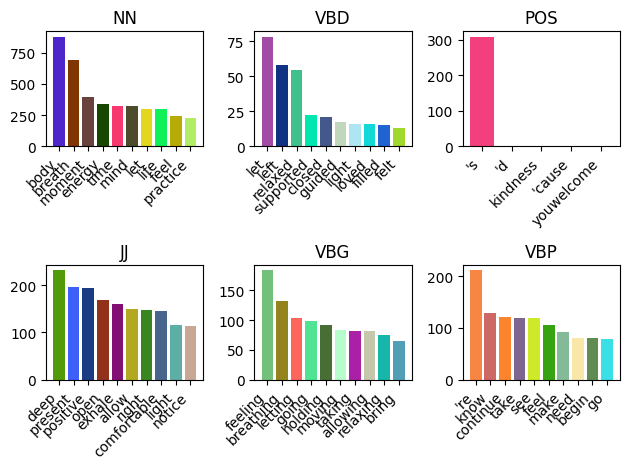

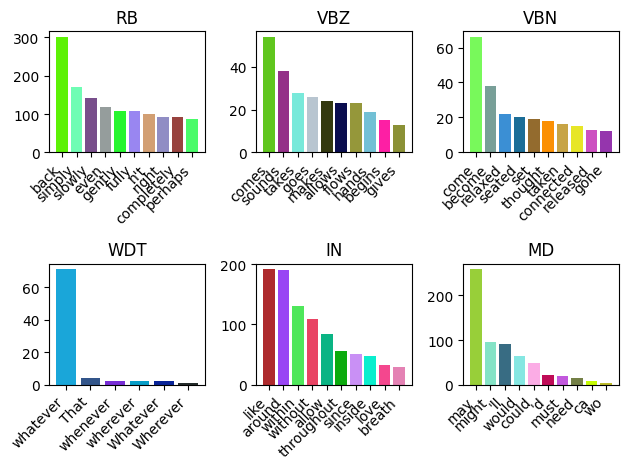

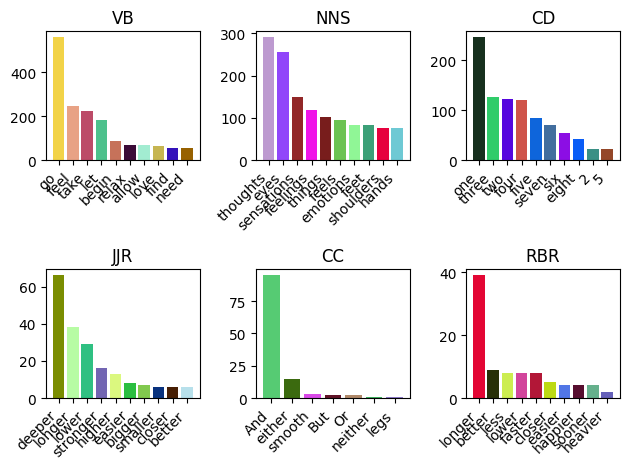

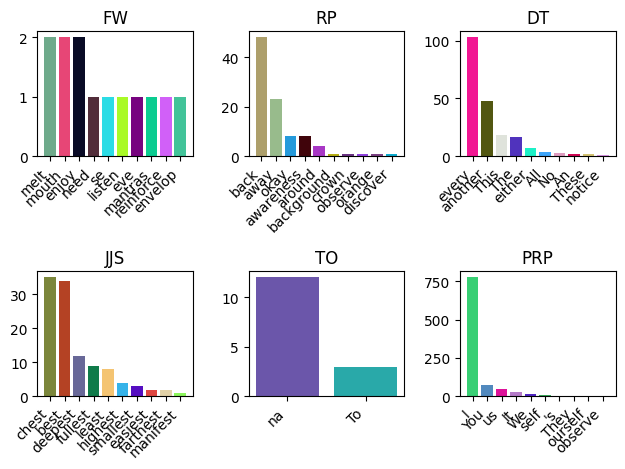

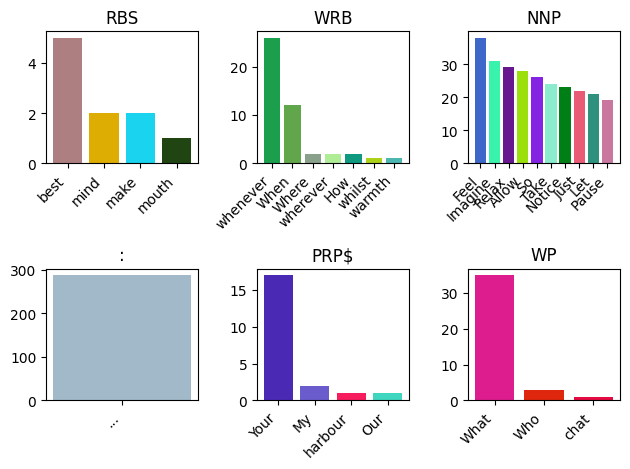

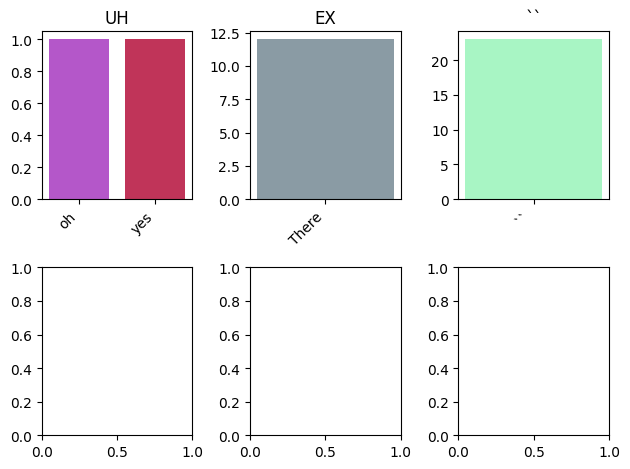

In [19]:
key = list(anxiety_top_pos_words.keys())
val = list(anxiety_top_pos_words.values())

for i in range (0, len(key), 6):
    fig, axs = plt.subplots(2, 3)
    
    if (i < len(key)): 
        k1 = key[i]
        v1 = val[i]
       
        v1_name = list()
        v1_freq = list()
        
        for j in v1:
            v1_name.append(j[0])
            v1_freq.append(j[1])
            
        axs[0, 0].bar(v1_name, v1_freq, color=np.random.rand(len(counts), 3))
        for label in axs[0, 0].get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')
        axs[0, 0].set_title(k1)
    
        if (i + 1 < len(key)):
            k2 = key[i+1]
            v2 = val[i+1]

            v2_name = list()
            v2_freq = list()
            
            for j in v2:
                v2_name.append(j[0])
                v2_freq.append(j[1])
                
            axs[0, 1].bar(v2_name, v2_freq, color=np.random.rand(len(counts), 3))
            for label in axs[0, 1].get_xticklabels():
                label.set_rotation(45)
                label.set_horizontalalignment('right')
            axs[0, 1].set_title(k2)

            if (i+2 < len(key)):
                k3 = key[i+2]
                v3 = val[i+2]

                v3_name = list()
                v3_freq = list()
                
                for j in v3:
                    v3_name.append(j[0])
                    v3_freq.append(j[1])
                    
                axs[0, 2].bar(v3_name, v3_freq, color=np.random.rand(len(counts), 3))
                for label in axs[0, 2].get_xticklabels():
                    label.set_rotation(45)
                    label.set_horizontalalignment('right')
                axs[0, 2].set_title(k3)
                    
                if (i+3 < len(key)):
                    k4 = key[i+3]
                    v4 = val[i+3]    

                    v4_name = list()
                    v4_freq = list()
                    
                    for j in v4:
                        v4_name.append(j[0])
                        v4_freq.append(j[1])
                        
                    axs[1, 0].bar(v4_name, v4_freq, color=np.random.rand(len(counts), 3))
                    for label in axs[1, 0].get_xticklabels():
                        label.set_rotation(45)
                        label.set_horizontalalignment('right')
                    axs[1, 0].set_title(k4)
                        
                    if (i+4 < len(key)):
                        k5 = key[i+4]
                        v5 = val[i+4]
    
                        v5_name = list()
                        v5_freq = list()
                        
                        for j in v5:
                            v5_name.append(j[0])
                            v5_freq.append(j[1])
                            
                        axs[1, 1].bar(v5_name, v5_freq, color=np.random.rand(len(counts), 3))
                        for label in axs[1, 1].get_xticklabels():
                            label.set_rotation(45)
                            label.set_horizontalalignment('right')
                        axs[1, 1].set_title(k5)
                        
                        if (i+5 < len(key)):
                            k6 = key[i+5]
                            v6 = val[i+5]
        
                            v6_name = list()
                            v6_freq = list()
                            
                            for j in v6:
                                v6_name.append(j[0])
                                v6_freq.append(j[1])
                                
                            axs[1, 2].bar(v6_name, v6_freq, color=np.random.rand(len(counts), 3))
                            for label in axs[1, 2].get_xticklabels():
                                label.set_rotation(45)
                                label.set_horizontalalignment('right')
                            axs[1, 2].set_title(k6)
    
    fig.tight_layout()
    plt.show()


Top 10 words in each POS for the anxiety meditations corpora.

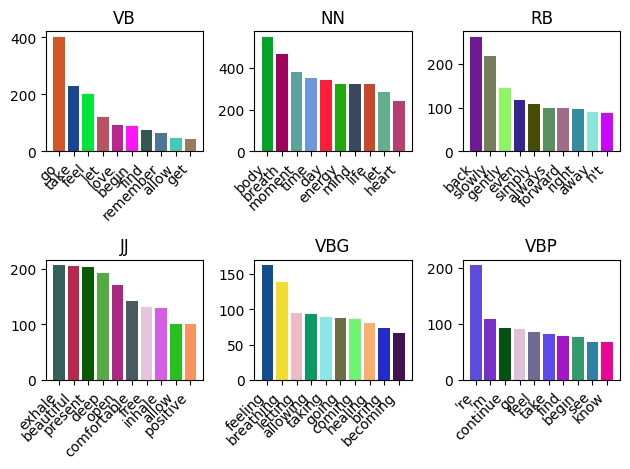

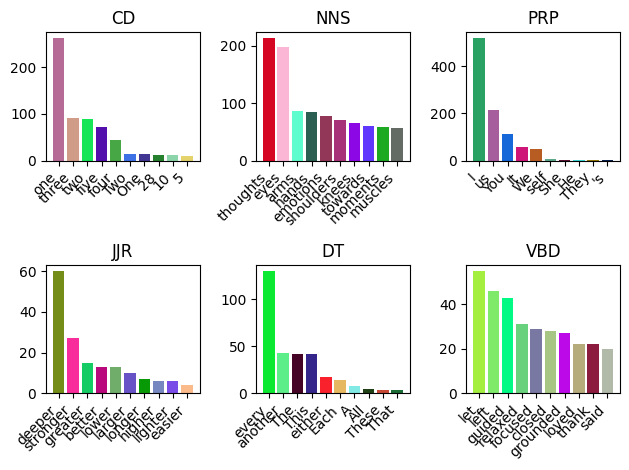

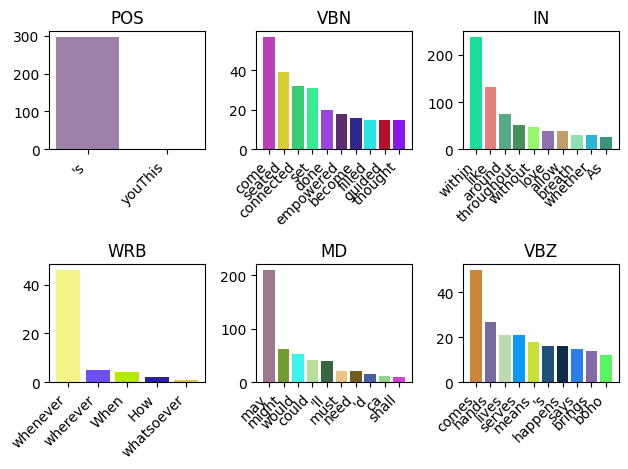

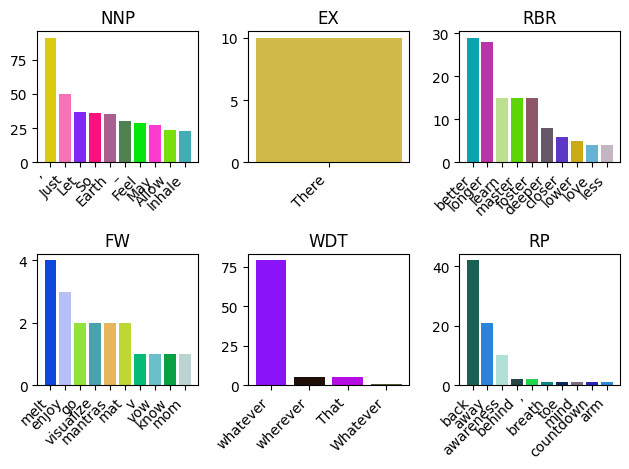

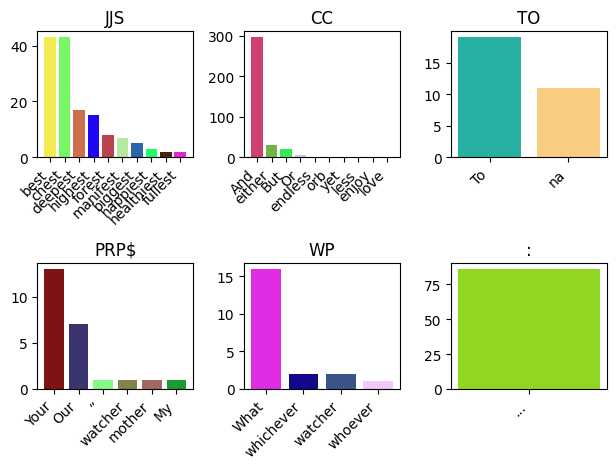

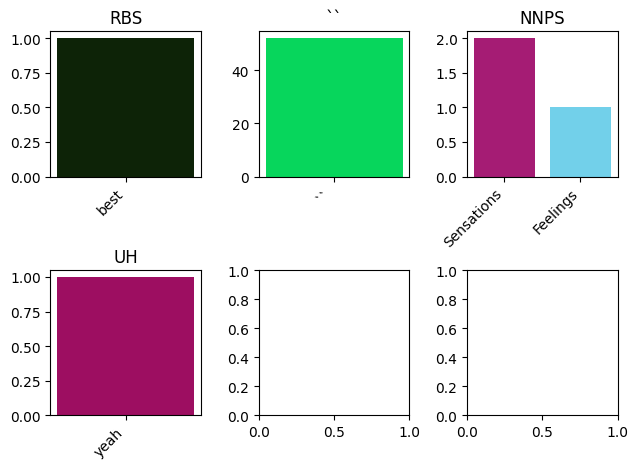

In [20]:
key = list(morning_top_pos_words.keys())
val = list(morning_top_pos_words.values())

for i in range (0, len(key), 6):
    fig, axs = plt.subplots(2, 3)
    
    if (i < len(key)): 
        k1 = key[i]
        v1 = val[i]
       
        v1_name = list()
        v1_freq = list()
        
        for j in v1:
            v1_name.append(j[0])
            v1_freq.append(j[1])
            
        axs[0, 0].bar(v1_name, v1_freq, color=np.random.rand(len(counts), 3))
        for label in axs[0, 0].get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')
        axs[0, 0].set_title(k1)
    
        if (i + 1 < len(key)):
            k2 = key[i+1]
            v2 = val[i+1]

            v2_name = list()
            v2_freq = list()
            
            for j in v2:
                v2_name.append(j[0])
                v2_freq.append(j[1])
                
            axs[0, 1].bar(v2_name, v2_freq, color=np.random.rand(len(counts), 3))
            for label in axs[0, 1].get_xticklabels():
                label.set_rotation(45)
                label.set_horizontalalignment('right')
            axs[0, 1].set_title(k2)

            if (i+2 < len(key)):
                k3 = key[i+2]
                v3 = val[i+2]

                v3_name = list()
                v3_freq = list()
                
                for j in v3:
                    v3_name.append(j[0])
                    v3_freq.append(j[1])
                    
                axs[0, 2].bar(v3_name, v3_freq, color=np.random.rand(len(counts), 3))
                for label in axs[0, 2].get_xticklabels():
                    label.set_rotation(45)
                    label.set_horizontalalignment('right')
                axs[0, 2].set_title(k3)
                    
                if (i+3 < len(key)):
                    k4 = key[i+3]
                    v4 = val[i+3]    

                    v4_name = list()
                    v4_freq = list()
                    
                    for j in v4:
                        v4_name.append(j[0])
                        v4_freq.append(j[1])
                        
                    axs[1, 0].bar(v4_name, v4_freq, color=np.random.rand(len(counts), 3))
                    for label in axs[1, 0].get_xticklabels():
                        label.set_rotation(45)
                        label.set_horizontalalignment('right')
                    axs[1, 0].set_title(k4)
                        
                    if (i+4 < len(key)):
                        k5 = key[i+4]
                        v5 = val[i+4]
    
                        v5_name = list()
                        v5_freq = list()
                        
                        for j in v5:
                            v5_name.append(j[0])
                            v5_freq.append(j[1])
                            
                        axs[1, 1].bar(v5_name, v5_freq, color=np.random.rand(len(counts), 3))
                        for label in axs[1, 1].get_xticklabels():
                            label.set_rotation(45)
                            label.set_horizontalalignment('right')
                        axs[1, 1].set_title(k5)
                        
                        if (i+5 < len(key)):
                            k6 = key[i+5]
                            v6 = val[i+5]
        
                            v6_name = list()
                            v6_freq = list()
                            
                            for j in v6:
                                v6_name.append(j[0])
                                v6_freq.append(j[1])
                                
                            axs[1, 2].bar(v6_name, v6_freq, color=np.random.rand(len(counts), 3))
                            for label in axs[1, 2].get_xticklabels():
                                label.set_rotation(45)
                                label.set_horizontalalignment('right')
                            axs[1, 2].set_title(k6)
    
    fig.tight_layout()
    plt.show()


Top 10 words in each POS for the morning meditations corpora.

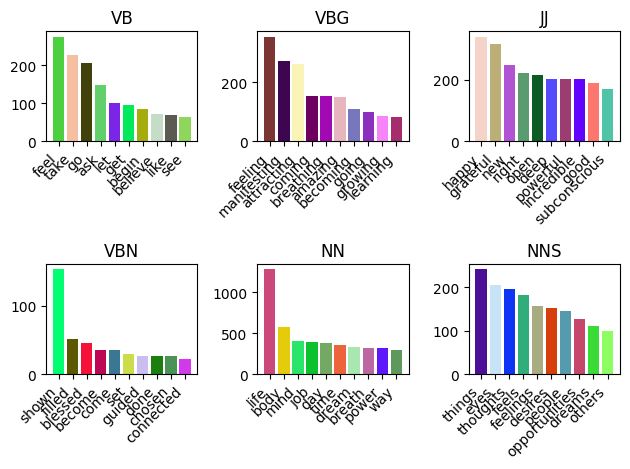

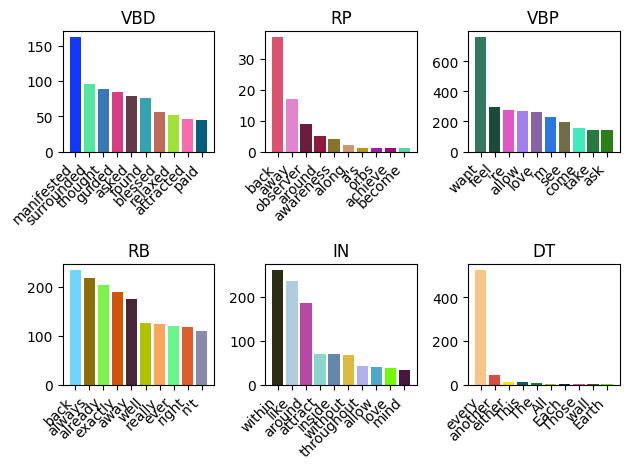

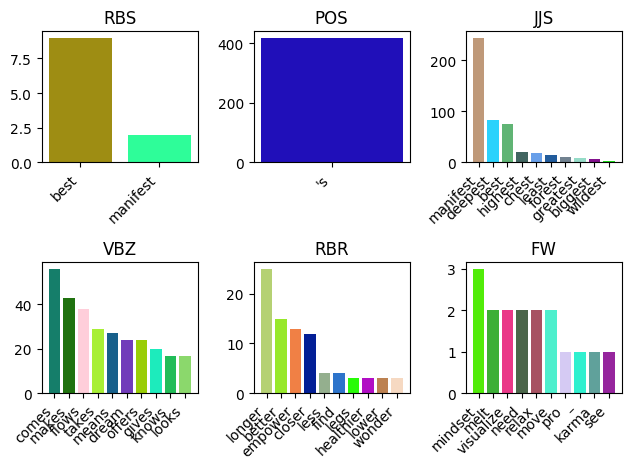

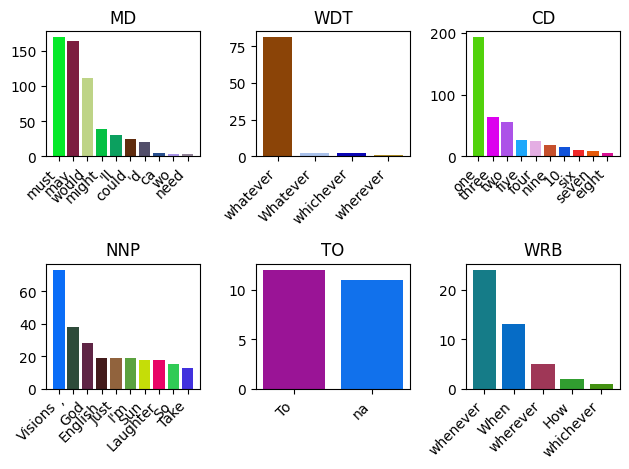

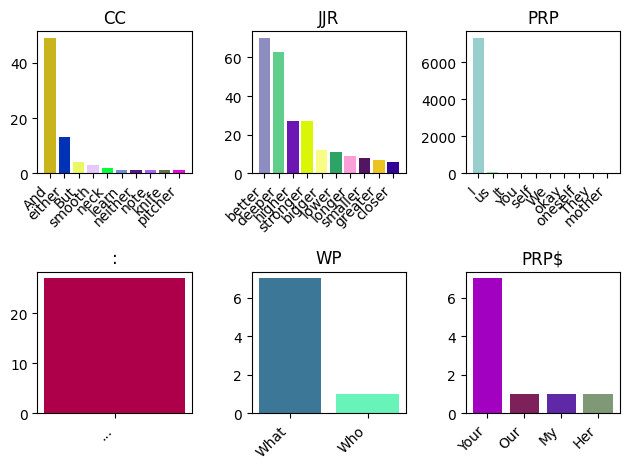

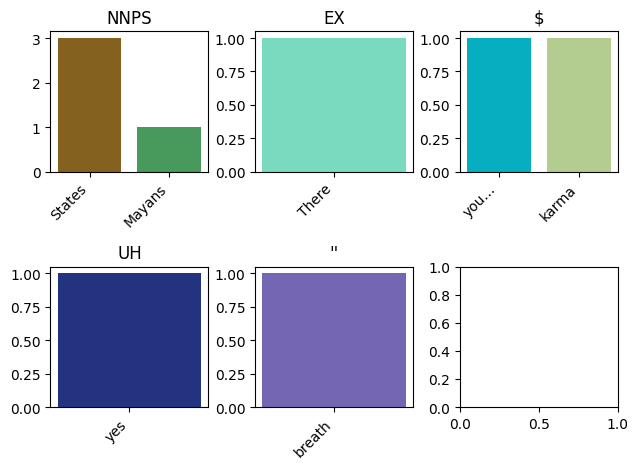

In [21]:
key = list(learningNgrowth_top_pos_words.keys())
val = list(learningNgrowth_top_pos_words.values())

for i in range (0, len(key), 6):
    fig, axs = plt.subplots(2, 3)
    
    if (i < len(key)): 
        k1 = key[i]
        v1 = val[i]
       
        v1_name = list()
        v1_freq = list()
        
        for j in v1:
            v1_name.append(j[0])
            v1_freq.append(j[1])
            
        axs[0, 0].bar(v1_name, v1_freq, color=np.random.rand(len(counts), 3))
        for label in axs[0, 0].get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')
        axs[0, 0].set_title(k1)
    
        if (i + 1 < len(key)):
            k2 = key[i+1]
            v2 = val[i+1]

            v2_name = list()
            v2_freq = list()
            
            for j in v2:
                v2_name.append(j[0])
                v2_freq.append(j[1])
                
            axs[0, 1].bar(v2_name, v2_freq, color=np.random.rand(len(counts), 3))
            for label in axs[0, 1].get_xticklabels():
                label.set_rotation(45)
                label.set_horizontalalignment('right')
            axs[0, 1].set_title(k2)

            if (i+2 < len(key)):
                k3 = key[i+2]
                v3 = val[i+2]

                v3_name = list()
                v3_freq = list()
                
                for j in v3:
                    v3_name.append(j[0])
                    v3_freq.append(j[1])
                    
                axs[0, 2].bar(v3_name, v3_freq, color=np.random.rand(len(counts), 3))
                for label in axs[0, 2].get_xticklabels():
                    label.set_rotation(45)
                    label.set_horizontalalignment('right')
                axs[0, 2].set_title(k3)
                    
                if (i+3 < len(key)):
                    k4 = key[i+3]
                    v4 = val[i+3]    

                    v4_name = list()
                    v4_freq = list()
                    
                    for j in v4:
                        v4_name.append(j[0])
                        v4_freq.append(j[1])
                        
                    axs[1, 0].bar(v4_name, v4_freq, color=np.random.rand(len(counts), 3))
                    for label in axs[1, 0].get_xticklabels():
                        label.set_rotation(45)
                        label.set_horizontalalignment('right')
                    axs[1, 0].set_title(k4)
                        
                    if (i+4 < len(key)):
                        k5 = key[i+4]
                        v5 = val[i+4]
    
                        v5_name = list()
                        v5_freq = list()
                        
                        for j in v5:
                            v5_name.append(j[0])
                            v5_freq.append(j[1])
                            
                        axs[1, 1].bar(v5_name, v5_freq, color=np.random.rand(len(counts), 3))
                        for label in axs[1, 1].get_xticklabels():
                            label.set_rotation(45)
                            label.set_horizontalalignment('right')
                        axs[1, 1].set_title(k5)
                        
                        if (i+5 < len(key)):
                            k6 = key[i+5]
                            v6 = val[i+5]
        
                            v6_name = list()
                            v6_freq = list()
                            
                            for j in v6:
                                v6_name.append(j[0])
                                v6_freq.append(j[1])
                                
                            axs[1, 2].bar(v6_name, v6_freq, color=np.random.rand(len(counts), 3))
                            for label in axs[1, 2].get_xticklabels():
                                label.set_rotation(45)
                                label.set_horizontalalignment('right')
                            axs[1, 2].set_title(k6)
    
    fig.tight_layout()
    plt.show()


Top 10 words in each POS for the learning and growth meditations corpora.